<a href="https://colab.research.google.com/github/Jakom001/Learning-Data-Science/blob/main/AI_ML_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI/ML Challenge**


**Context**
A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

**Objective**
You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

**About the dataset**
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

> Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

> Survived_1_year == 1, implies that the patient survived after 1 year of treatment

**Data Description:**

ID_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

Load libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

Load the dataset

In [18]:

pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

Undestand the data

In [19]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [20]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [68]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,...,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.0
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,...,0.077586,0.018314,0.082651,0.373165,0.000563,0.573494,0.425943,0.698532,0.301468,1.0
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.294574,0.333872,0.377837,0.269314,0.475241,...,0.267525,0.134087,0.275361,0.483656,0.023718,0.494580,0.494496,0.458905,0.458905,0.0
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [22]:
# The counts of 1 and 0 's 
pharma_data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

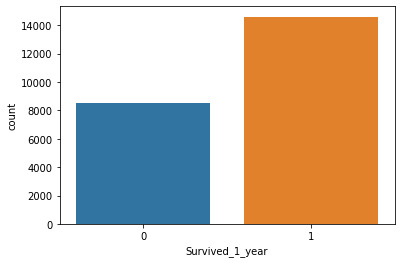

In [53]:
# visualize the those who suvivedin one year and those who didn't
sns.countplot(pharma_data.Survived_1_year)

Missing Data

In [27]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

We can see there are null values in the dataset.

Dealing with the Missing Data

Will fill missing values with the mean value for the numerical column

In [28]:
# Select the numeric columns
num_cols = pharma_data.select_dtypes(include=np.number).columns

# Fill the null values with the mean of the columns
pharma_data[num_cols] = pharma_data[num_cols].fillna(pharma_data[num_cols].mean())

In [34]:
# Fill categorical columns with mode
categorical_cols = pharma_data.select_dtypes(exclude=np.number).columns

pharma_data[categorical_cols] =pharma_data[categorical_cols].fillna(pharma_data[categorical_cols].mode().iloc[0])

In [35]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

**One hot encoding**


creating dummies for categorical columns <br>
Each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column

In [36]:
pharma_data = pd.get_dummies(pharma_data, columns=categorical_cols)

pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,1,0,1,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,1
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,0,1
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1,0,1


Separate input variable and Target Variable

Split the dataset.

In [43]:
X = pharma_data.drop('Survived_1_year', axis =1)
X = pharma_data.drop('Patient_ID', axis =1)

y = pharma_data.Survived_1_year

Split the data

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 10) 

Build a model.
<br> We will use Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

# Define the model
pharma_model = LogisticRegression()

# fit the model
pharma_model.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Prediction 
y_pred = pharma_model.predict(X_test)

In [66]:
# prediction to dataframe
predictions = pd.DataFrame(y_pred, columns=['prediction'])
predictions

,prediction
0,1
1,0
2,1
3,1
4,1
...,...
6925,0
6926,0
6927,1
6928,1


Model Evaluation

In [56]:
from sklearn.metrics import f1_score
print("f1_score", f1_score(y_test, y_pred))

f1_score 0.9903522548799641


Download the Predictions

In [67]:
from google.colab import files

predictions.to_csv('pharma_predictions.csv', encoding = 'utf-8-sig') 
files.download('pharma_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>